# Import Packages

In [155]:
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster import hierarchy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from sklearn.metrics import accuracy_score
from scipy.stats import mode

In [97]:
# Importing the data set and creating an array using numpy
# data = np.genfromtxt("mnist.csv", delimiter=",", dtype=int, skip_header=1)
data = pd.read_csv("mnist.csv", delimiter=",", dtype=int)

x_train = data.iloc[:,1:]
y_train = data["label"]
x_test = data.iloc[:,1:]
y_test = data["label"]

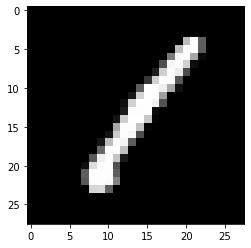

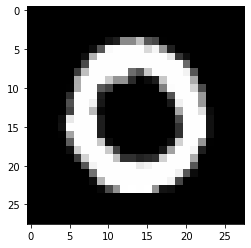

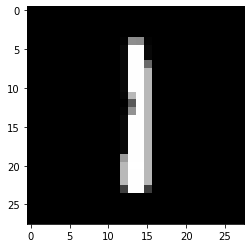

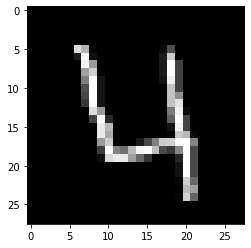

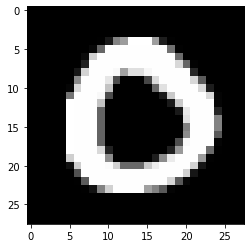

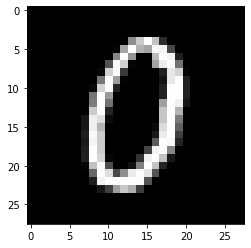

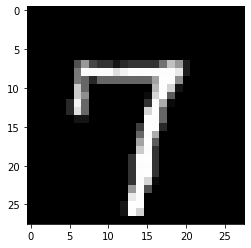

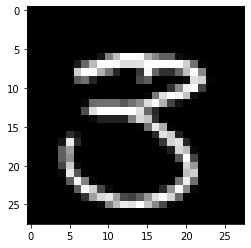

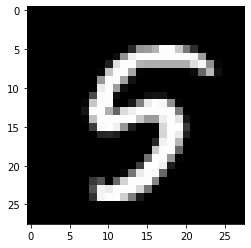

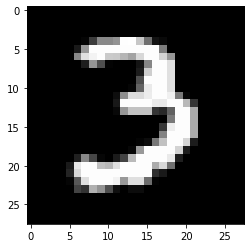

In [73]:
# Printing first 10 rows just for show
for i in range(10):
    square_data = data.iloc[i,1:].values.reshape(28, 28)

    plt.imshow(square_data, cmap="gray")
    plt.show()

# Clustering Algorithms

## Transforming data into plotable points

### PCA data for 2D visualization

In [138]:
pca = PCA(n_components=2)

components = pca.fit_transform(x_train)

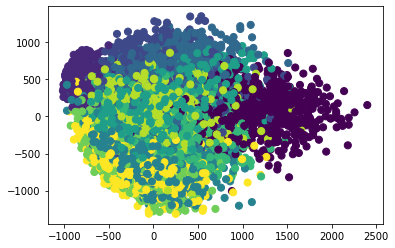

In [139]:
plt.scatter(components[:,0], components[:,1], c=y_train, s=50)

### TSNE data for 3D visualization

In [76]:
# Too many data that takes program too long, so only using 1000 samples.
tsne = TSNE(n_components=3)

tsne_data = tsne.fit_transform(x_train.iloc[0:1000,0:])

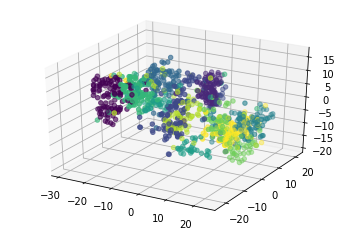

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(tsne_data[:,0], tsne_data[:,1], tsne_data[:,2], c= y_train.iloc[0:1000,0])

# Accuracy of data

In [160]:
def maplabels(clust, train_label):
    labels = np.zeros_like(clust)
    for i in range(10):
        mask = (clust == i)
        labels[mask] = mode(train_label[mask])[0]
    return labels

# KMeans Clustering

### 2D with PCA

In [129]:
# KMean cluster
kmeans_cluster = KMeans(n_clusters=10)
kmeans_cluster.fit(components)
y_kmeans = kmeans_cluster.fit_predict(components)

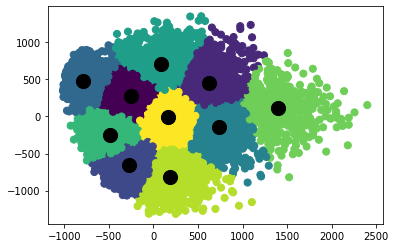

In [130]:
plt.scatter(components[:,0], components[:, 1], c=y_kmeans, s=50, cmap="viridis")
centroids = kmeans_cluster.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", s=200)

In [164]:
#kmeans labels
y_predict = kmeans_cluster.labels_
#actual labels
y_true = y_test
map_label = maplabels(y_predict, y_true)
print("KMeans Accuracy: ", accuracy_score(y_true, map_label))

KMeans Accuracy:  0.4119


### 3D with TSNE

In [165]:
# KMean cluster
kmeans_cluster = KMeans(n_clusters=10)
kmeans_cluster.fit(tsne_data)
y_kmeans = kmeans_cluster.fit_predict(tsne_data)

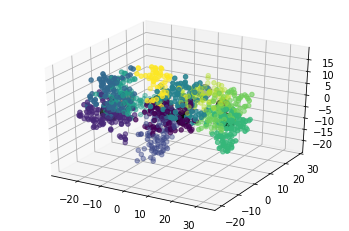

In [166]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(tsne_data[:,0], tsne_data[:,1], tsne_data[:,2], c=y_kmeans)
centroids = kmeans_cluster.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], c="black", s=200)

In [168]:
#kmeans labels
y_predict = kmeans_cluster.labels_
#actual labels
y_true = y_test[0:1000]
map_label = maplabels(y_predict, y_true)
print("KMeans Accuracy: ", accuracy_score(y_true, map_label))

KMeans Accuracy:  0.668


# Hierarchical Clustering

### 2D with PCA

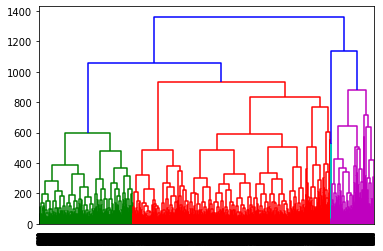

In [171]:
dendrogram = sch.dendrogram(sch.linkage(components, method='average'))

In [172]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='average')
hierarchical_cluster.fit(components)
y_hc = hierarchical_cluster.fit_predict(components)

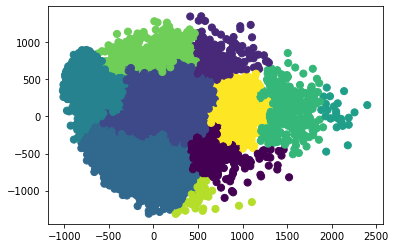

In [173]:
plt.scatter(components[:,0], components[:, 1], c=y_hc, s=50, cmap="viridis")

In [175]:
#hierarchical labels
y_predict = hierarchical_cluster.labels_
#actual labels
y_true = y_test
map_label = maplabels(y_predict, y_true)
print("Hierarchical Accuracy: ", accuracy_score(y_true, map_label))

KMeans Accuracy:  0.3785


### 3D with TSNE

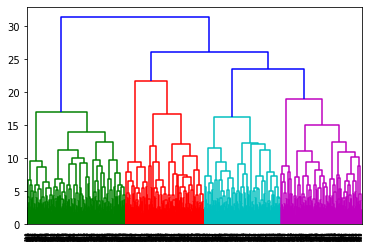

In [176]:
dendrogram = sch.dendrogram(sch.linkage(tsne_data, method='average'))

In [177]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='average')
hierarchical_cluster.fit(tsne_data)
y_hc = hierarchical_cluster.fit_predict(tsne_data)

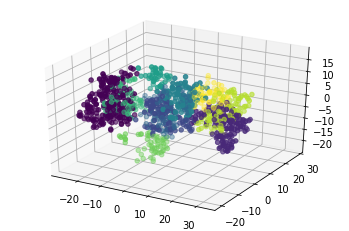

In [178]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(tsne_data[:,0], tsne_data[:,1], tsne_data[:,2], c=y_hc)

In [180]:
#hierarchical labels
y_predict = hierarchical_cluster.labels_
#actual labels
y_true = y_test[0:1000]
map_label = maplabels(y_predict, y_true)
print("Hierarchical Accuracy: ", accuracy_score(y_true, map_label))

Hierarchical Accuracy:  0.638


# DBScan Clustering

### 2D with PCA

In [206]:
# DBSCAN cluster
dbscan_cluster = DBSCAN(eps=200, min_samples=600)
dbscan_cluster.fit(components)
y_db = dbscan_cluster.fit_predict(components)

### Used to find the epsilon value needed

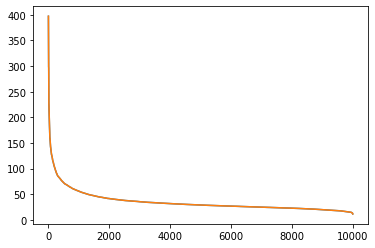

In [207]:
nbrs = NearestNeighbors(n_neighbors=10).fit(components)
distances, indices = nbrs.kneighbors(components)
distanceDec = sorted(distances[:,9], reverse=True)
plt.plot(indices[:,0], distanceDec)
plt.plot(list(range(1,10001)), distanceDec)

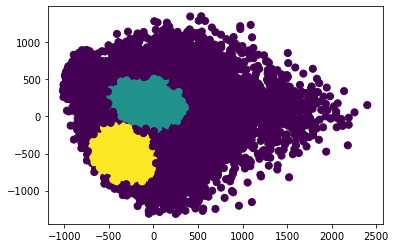

In [208]:
plt.scatter(components[:,0], components[:, 1], c=y_db, s=50, cmap="viridis")

In [209]:
#hierarchical labels
y_predict = dbscan_cluster.labels_
#actual labels
y_true = y_test
map_label = maplabels(y_predict, y_true)
print("DBScan Accuracy: ", accuracy_score(y_true, map_label))

DBScan Accuracy:  0.2119


### 3D with TSNE

In [211]:
# DBSCAN cluster
dbscan_cluster = DBSCAN(eps=10, min_samples=1000)
dbscan_cluster.fit(tsne_data)
y_db = dbscan_cluster.fit_predict(tsne_data)

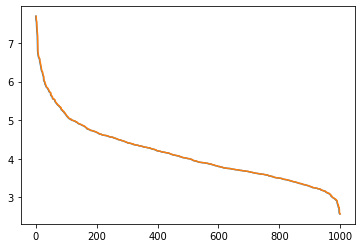

In [212]:
# Used to find hte epsilon value needed
nbrs = NearestNeighbors(n_neighbors=10).fit(tsne_data)
distances, indices = nbrs.kneighbors(tsne_data)
distanceDec = sorted(distances[:,9], reverse=True)
plt.plot(indices[:,0], distanceDec)
plt.plot(list(range(1,1001)), distanceDec)

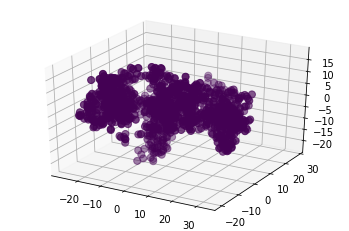

In [213]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(tsne_data[:,0], tsne_data[:,1], tsne_data[:,2], c=y_db, s=50, cmap="viridis")

In [215]:
#hierarchical labels
y_predict = dbscan_cluster.labels_
#actual labels
y_true = y_test[0:1000]
map_label = maplabels(y_predict, y_true)
print("DBScan Accuracy: ", accuracy_score(y_true, map_label))

DBScan Accuracy:  0.107
